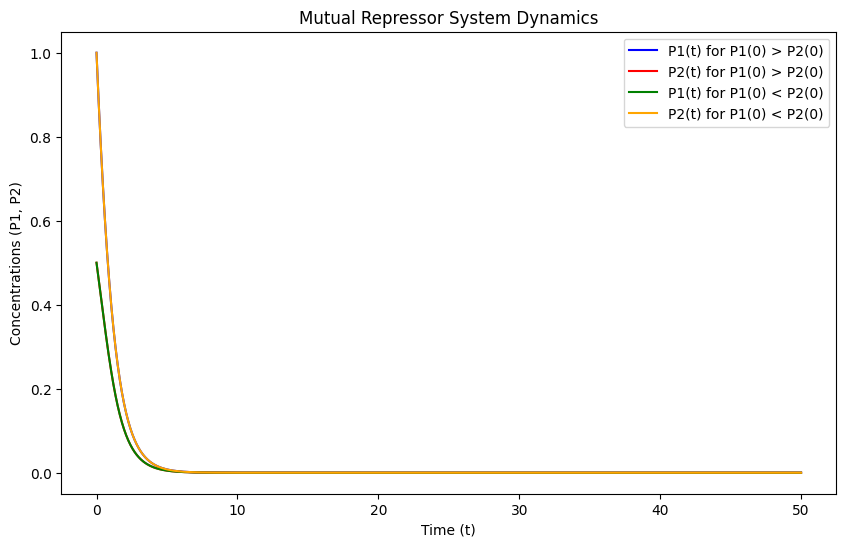

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
n = 2  # Nonlinearity
P1_init1, P2_init1 = 1, 0.5  # Initial conditions 1: P1(0) > P2(0)
P1_init2, P2_init2 = 0.5, 1  # Initial conditions 2: P1(0) < P2(0)
t = np.linspace(0, 50, 1000)  # Time vector

# Define the differential equations
def model(P, t, n):
    P1, P2 = P
    dP1_dt = -P1 / (1 + P2**n)
    dP2_dt = -P2 / (1 + P1**n)
    return [dP1_dt, dP2_dt]

# Solve using scipy's odeint (inbuilt solver)
P_init1 = [P1_init1, P2_init1]
P_init2 = [P1_init2, P2_init2]
P1_sol1, P2_sol1 = odeint(model, P_init1, t, args=(n,)).T
P1_sol2, P2_sol2 = odeint(model, P_init2, t, args=(n,)).T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, P1_sol1, label='P1(t) for P1(0) > P2(0)', color='blue')
plt.plot(t, P2_sol1, label='P2(t) for P1(0) > P2(0)', color='red')
plt.plot(t, P1_sol2, label='P1(t) for P1(0) < P2(0)', color='green')
plt.plot(t, P2_sol2, label='P2(t) for P1(0) < P2(0)', color='orange')
plt.xlabel('Time (t)')
plt.ylabel('Concentrations (P1, P2)')
plt.title('Mutual Repressor System Dynamics')
plt.legend()
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Example model: dP/dt = f(P)
def model(t, P):
    P1, P2 = P
    # Example differential equations (you can replace these with your model's system)
    dP1_dt = -P1 + P2
    dP2_dt = P1 - P2
    return [dP1_dt, dP2_dt]

# Define the initial conditions
P_init = [1.0, 0.0]  # Initial values for P1 and P2
t_span = (0, 10)  # Time interval
t_eval = np.linspace(0, 10, 100)  # Time points for evaluation

def euler_method(model, P_init, t_eval, dt=0.01):
    P = np.array(P_init)
    P_sol = np.zeros((len(t_eval), 2))
    
    for i, t in enumerate(t_eval):
        P_sol[i, :] = P
        dP = np.array(model(t, P))  # Get derivatives from the model
        P = P + dP * dt  # Update P using Euler's method
        
    return P_sol

def rk4_method(model, P_init, t_eval, dt=0.01):
    P = np.array(P_init)
    P_sol = np.zeros((len(t_eval), 2))
    
    for i, t in enumerate(t_eval):
        P_sol[i, :] = P
        k1 = np.array(model(t, P))
        k2 = np.array(model(t + 0.5 * dt, P + 0.5 * dt * k1))
        k3 = np.array(model(t + 0.5 * dt, P + 0.5 * dt * k2))
        k4 = np.array(model(t + dt, P + dt * k3))
        P = P + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)  # Update P using RK4
        
    return P_sol

def solve_with_ivp(model, P_init, t_span, t_eval):
    sol = solve_ivp(model, t_span, P_init, t_eval=t_eval, method='RK45')
    return sol.t, sol.y.T



In [9]:
def rk4_method(model, P_init, t, n, dt=0.01):
    P = np.array(P_init)
    P_sol = np.zeros((len(t), 2))
    for i in range(len(t)):
        P_sol[i, :] = P
        k1 = np.array(model(P, t[i], n))
        k2 = np.array(model(P + 0.5 * dt * k1, t[i] + 0.5 * dt, n))
        k3 = np.array(model(P + 0.5 * dt * k2, t[i] + 0.5 * dt, n))
        k4 = np.array(model(P + dt * k3, t[i] + dt, n))
        P = P + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return P_sol[:, 0], P_sol[:, 1]


In [10]:
# Run the Euler, RK4, and inbuilt solver
P_euler = euler_method(model, P_init, t_eval, dt=0.01)
P_rk4 = rk4_method(model, P_init, t_eval, dt=0.01)
t_ivp, P_ivp = solve_with_ivp(model, P_init, t_span, t_eval)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot P1 (first component)
plt.subplot(2, 1, 1)
plt.plot(t_eval, P_euler[:, 0], label='Euler Method', linestyle='-', color='r')
plt.plot(t_eval, P_rk4[:, 0], label='RK4 Method', linestyle='--', color='g')
plt.plot(t_ivp, P_ivp[:, 0], label='Inbuilt Solver (RK45)', linestyle='-.', color='b')
plt.title('P1(t) vs Time')
plt.xlabel('Time')
plt.ylabel('P1(t)')
plt.legend()

# Plot P2 (second component)
plt.subplot(2, 1, 2)
plt.plot(t_eval, P_euler[:, 1], label='Euler Method', linestyle='-', color='r')
plt.plot(t_eval, P_rk4[:, 1], label='RK4 Method', linestyle='--', color='g')
plt.plot(t_ivp, P_ivp[:, 1], label='Inbuilt Solver (RK45)', linestyle='-.', color='b')
plt.title('P2(t) vs Time')
plt.xlabel('Time')
plt.ylabel('P2(t)')
plt.legend()

plt.tight_layout()
plt.show()


TypeError: rk4_method() missing 1 required positional argument: 'n'

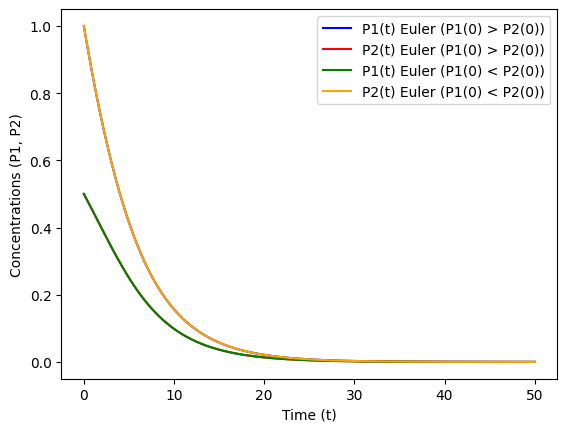

In [11]:
# Parameters
n = 2
P1_init1, P2_init1 = 1, 0.5  # Initial conditions 1
P1_init2, P2_init2 = 0.5, 1  # Initial conditions 2
t = np.linspace(0, 50, 1000)  # Time vector

# Define the model function (same as before)
def model(P, t, n):
    P1, P2 = P
    dP1_dt = -P1 / (1 + P2**n)
    dP2_dt = -P2 / (1 + P1**n)
    return [dP1_dt, dP2_dt]

# Euler's method implementation
def euler_method(model, P_init, t, n, dt=0.01):
    P = np.array(P_init)
    P_sol = np.zeros((len(t), 2))
    for i in range(len(t)):
        P_sol[i, :] = P
        dP = np.array(model(P, t[i], n))
        P = P + dP * dt
    return P_sol[:, 0], P_sol[:, 1]

# Use Euler's method to solve for both initial conditions
P1_euler1, P2_euler1 = euler_method(model, [P1_init1, P2_init1], t, n)
P1_euler2, P2_euler2 = euler_method(model, [P1_init2, P2_init2], t, n)

# Plot results
plt.plot(t, P1_euler1, label='P1(t) Euler (P1(0) > P2(0))', color='blue')
plt.plot(t, P2_euler1, label='P2(t) Euler (P1(0) > P2(0))', color='red')
plt.plot(t, P1_euler2, label='P1(t) Euler (P1(0) < P2(0))', color='green')
plt.plot(t, P2_euler2, label='P2(t) Euler (P1(0) < P2(0))', color='orange')
plt.xlabel('Time (t)')
plt.ylabel('Concentrations (P1, P2)')
plt.legend()
plt.show()


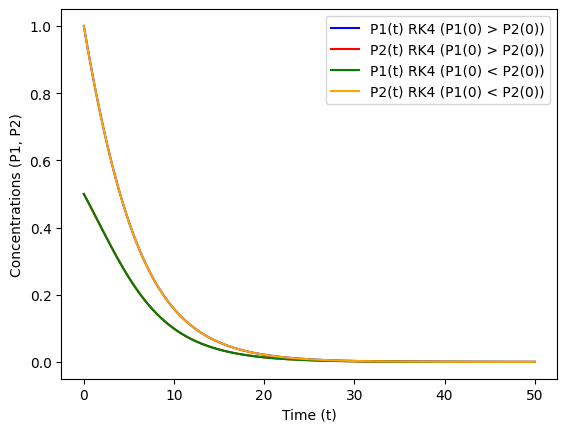

In [12]:
# Runge-Kutta 4th Order (RK4) Method implementation
def rk4_method(model, P_init, t, n, dt=0.01):
    P = np.array(P_init)
    P_sol = np.zeros((len(t), 2))
    for i in range(len(t)):
        P_sol[i, :] = P
        k1 = np.array(model(P, t[i], n))
        k2 = np.array(model(P + 0.5 * dt * k1, t[i] + 0.5 * dt, n))
        k3 = np.array(model(P + 0.5 * dt * k2, t[i] + 0.5 * dt, n))
        k4 = np.array(model(P + dt * k3, t[i] + dt, n))
        P = P + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return P_sol[:, 0], P_sol[:, 1]

# Use RK4 method to solve for both initial conditions
P1_rk4_1, P2_rk4_1 = rk4_method(model, [P1_init1, P2_init1], t, n)
P1_rk4_2, P2_rk4_2 = rk4_method(model, [P1_init2, P2_init2], t, n)

# Plot results
plt.plot(t, P1_rk4_1, label='P1(t) RK4 (P1(0) > P2(0))', color='blue')
plt.plot(t, P2_rk4_1, label='P2(t) RK4 (P1(0) > P2(0))', color='red')
plt.plot(t, P1_rk4_2, label='P1(t) RK4 (P1(0) < P2(0))', color='green')
plt.plot(t, P2_rk4_2, label='P2(t) RK4 (P1(0) < P2(0))', color='orange')
plt.xlabel('Time (t)')
plt.ylabel('Concentrations (P1, P2)')
plt.legend()
plt.show()


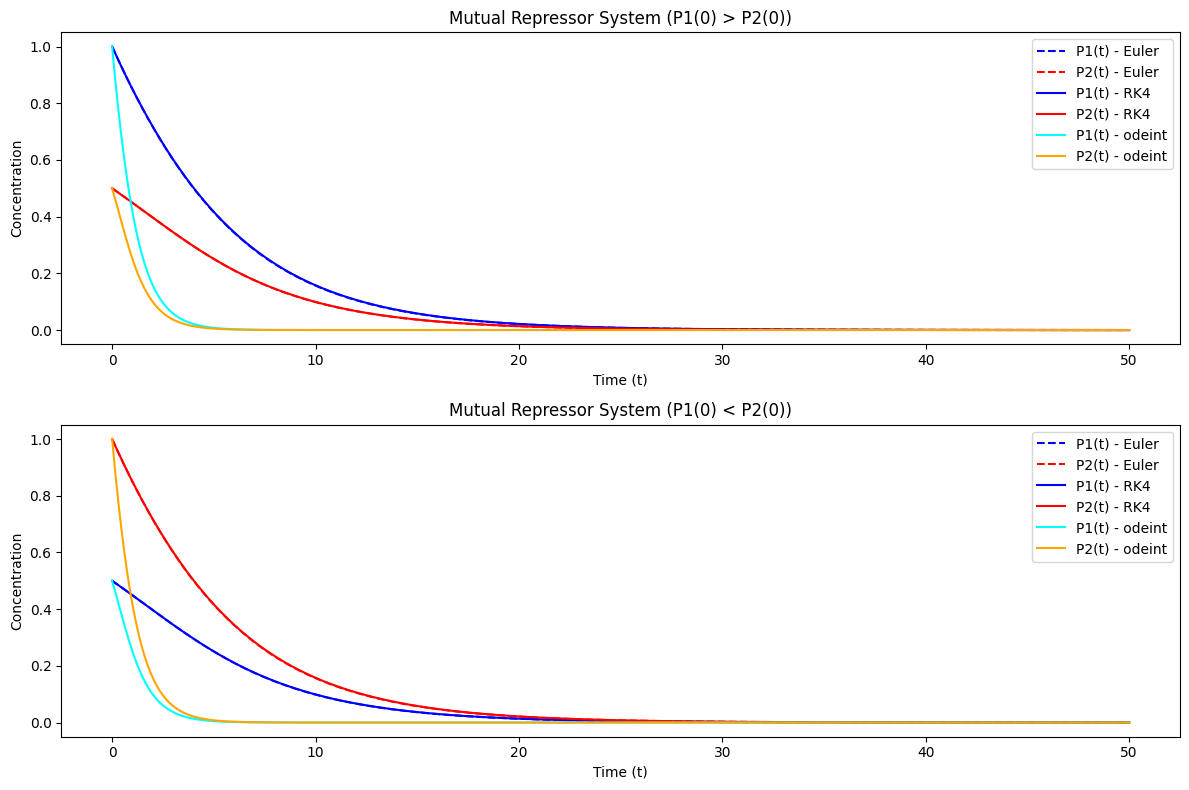

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the differential equations for the mutual repressor system
def model(P, t, n):
    P1, P2 = P
    dP1_dt = -P1 / (1 + P2**n)
    dP2_dt = -P2 / (1 + P1**n)
    return [dP1_dt, dP2_dt]

# Euler's method implementation
def euler_method(model, P_init, t, n, dt=0.01):
    P = np.array(P_init)
    P_sol = np.zeros((len(t), 2))
    for i in range(len(t)):
        P_sol[i, :] = P
        dP = np.array(model(P, t[i], n))
        P = P + dP * dt
    return P_sol[:, 0], P_sol[:, 1]

# Runge-Kutta 4th Order (RK4) method implementation
def rk4_method(model, P_init, t, n, dt=0.01):
    P = np.array(P_init)
    P_sol = np.zeros((len(t), 2))
    for i in range(len(t)):
        P_sol[i, :] = P
        k1 = np.array(model(P, t[i], n))
        k2 = np.array(model(P + 0.5 * dt * k1, t[i] + 0.5 * dt, n))
        k3 = np.array(model(P + 0.5 * dt * k2, t[i] + 0.5 * dt, n))
        k4 = np.array(model(P + dt * k3, t[i] + dt, n))
        P = P + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return P_sol[:, 0], P_sol[:, 1]

# Parameters
n = 2  # Nonlinearity parameter
P1_init1, P2_init1 = 1, 0.5  # Initial conditions: P1(0) > P2(0)
P1_init2, P2_init2 = 0.5, 1  # Initial conditions: P1(0) < P2(0)
t = np.linspace(0, 50, 1000)  # Time vector

# Solve using Euler's method
P1_euler1, P2_euler1 = euler_method(model, [P1_init1, P2_init1], t, n)
P1_euler2, P2_euler2 = euler_method(model, [P1_init2, P2_init2], t, n)

# Solve using RK4 method
P1_rk4_1, P2_rk4_1 = rk4_method(model, [P1_init1, P2_init1], t, n)
P1_rk4_2, P2_rk4_2 = rk4_method(model, [P1_init2, P2_init2], t, n)

# Solve using scipy's odeint (inbuilt solver)
P_init1 = [P1_init1, P2_init1]
P_init2 = [P1_init2, P2_init2]
P1_odeint1, P2_odeint1 = odeint(model, P_init1, t, args=(n,)).T
P1_odeint2, P2_odeint2 = odeint(model, P_init2, t, args=(n,)).T

# Plot the results for both initial conditions
plt.figure(figsize=(12, 8))

# Plot for the first initial condition (P1(0) > P2(0))
plt.subplot(2, 1, 1)
plt.plot(t, P1_euler1, label='P1(t) - Euler', linestyle='--', color='blue')
plt.plot(t, P2_euler1, label='P2(t) - Euler', linestyle='--', color='red')
plt.plot(t, P1_rk4_1, label='P1(t) - RK4', color='blue')
plt.plot(t, P2_rk4_1, label='P2(t) - RK4', color='red')
plt.plot(t, P1_odeint1, label='P1(t) - odeint', color='cyan')
plt.plot(t, P2_odeint1, label='P2(t) - odeint', color='orange')
plt.title('Mutual Repressor System (P1(0) > P2(0))')
plt.xlabel('Time (t)')
plt.ylabel('Concentration')
plt.legend()

# Plot for the second initial condition (P1(0) < P2(0))
plt.subplot(2, 1, 2)
plt.plot(t, P1_euler2, label='P1(t) - Euler', linestyle='--', color='blue')
plt.plot(t, P2_euler2, label='P2(t) - Euler', linestyle='--', color='red')
plt.plot(t, P1_rk4_2, label='P1(t) - RK4', color='blue')
plt.plot(t, P2_rk4_2, label='P2(t) - RK4', color='red')
plt.plot(t, P1_odeint2, label='P1(t) - odeint', color='cyan')
plt.plot(t, P2_odeint2, label='P2(t) - odeint', color='orange')
plt.title('Mutual Repressor System (P1(0) < P2(0))')
plt.xlabel('Time (t)')
plt.ylabel('Concentration')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


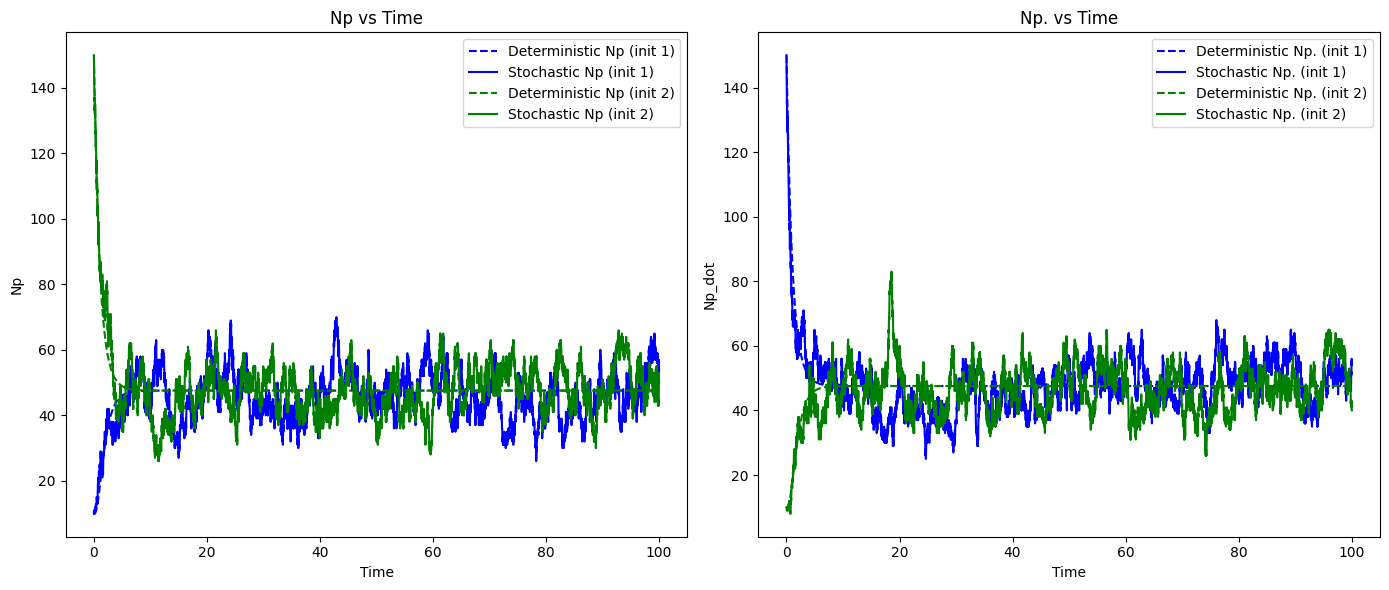

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
k1 = 50
k2 = 50
K = 100
n = 4
d = 1
T_max = 100

# Gillespie Algorithm Implementation
def gillespie(Np0, Np_dot0, T_max):
    time = [0]
    Np = [Np0]
    Np_dot = [Np_dot0]
    
    t = 0
    np_curr = Np0
    np_dot_curr = Np_dot0

    while t < T_max:
        # Propensities
        a1 = k1 / (1 + (np_dot_curr / K)**n)
        a2 = k2 / (1 + (np_curr / K)**n)
        a3 = d * np_curr
        a4 = d * np_dot_curr

        a0 = a1 + a2 + a3 + a4
        if a0 == 0:
            break
        
        # Time to next reaction
        r1 = np.random.rand()
        tau = -np.log(r1) / a0
        t += tau

        # Determine which reaction
        r2 = np.random.rand() * a0
        if r2 < a1:
            np_curr += 1  # Production of Np
        elif r2 < a1 + a2:
            np_dot_curr += 1  # Production of Np_dot
        elif r2 < a1 + a2 + a3:
            np_curr -= 1  # Degradation of Np
        else:
            np_dot_curr -= 1  # Degradation of Np_dot

        # Save data
        time.append(t)
        Np.append(np_curr)
        Np_dot.append(np_dot_curr)

    return np.array(time), np.array(Np), np.array(Np_dot)

# Deterministic model
def deterministic(y, t, k1, k2, K, n, d):
    Np, Np_dot = y
    dNp = k1 / (1 + (Np_dot / K)**n) - d * Np
    dNp_dot = k2 / (1 + (Np / K)**n) - d * Np_dot
    return [dNp, dNp_dot]

# Simulate deterministic
t_det = np.linspace(0, T_max, 1000)

# Two initial conditions
init_conds = [(10, 150), (150, 10)]
colors = ['blue', 'green']

plt.figure(figsize=(14, 6))

for i, (Np0, Np_dot0) in enumerate(init_conds):
    # Deterministic
    y0 = [Np0, Np_dot0]
    sol = odeint(deterministic, y0, t_det, args=(k1, k2, K, n, d))
    Np_det, Np_dot_det = sol[:, 0], sol[:, 1]

    # Gillespie
    t_stoch, Np_stoch, Np_dot_stoch = gillespie(Np0, Np_dot0, T_max)

    # Plotting
    plt.subplot(1, 2, 1)
    plt.plot(t_det, Np_det, '--', color=colors[i], label=f'Deterministic Np (init {i+1})')
    plt.plot(t_stoch, Np_stoch, '-', color=colors[i], label=f'Stochastic Np (init {i+1})')

    plt.subplot(1, 2, 2)
    plt.plot(t_det, Np_dot_det, '--', color=colors[i], label=f'Deterministic Np. (init {i+1})')
    plt.plot(t_stoch, Np_dot_stoch, '-', color=colors[i], label=f'Stochastic Np. (init {i+1})')

# Final plot formatting
plt.subplot(1, 2, 1)
plt.xlabel('Time')
plt.ylabel('Np')
plt.title('Np vs Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time')
plt.ylabel('Np_dot')
plt.title('Np. vs Time')
plt.legend()

plt.tight_layout()
plt.show()


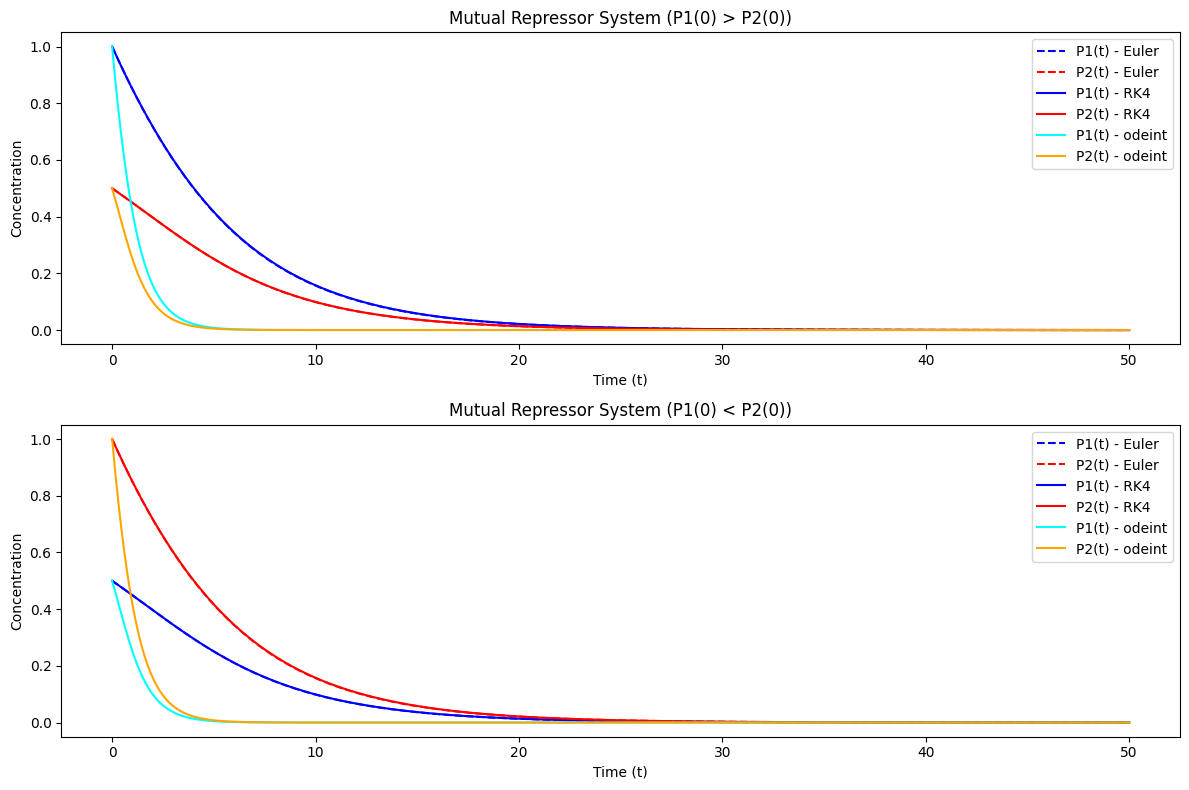

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the differential equations for the mutual repressor system
def model(P, t, n):
    P1, P2 = P
    dP1_dt = -P1 / (1 + P2**n)
    dP2_dt = -P2 / (1 + P1**n)
    return [dP1_dt, dP2_dt]

# Euler's method implementation
def euler_method(model, P_init, t, n, dt=0.01):
    P = np.array(P_init)
    P_sol = np.zeros((len(t), 2))
    for i in range(len(t)):
        P_sol[i, :] = P
        dP = np.array(model(P, t[i], n))
        P = P + dP * dt
    return P_sol[:, 0], P_sol[:, 1]

# Runge-Kutta 4th Order (RK4) method implementation
def rk4_method(model, P_init, t, n, dt=0.01):
    P = np.array(P_init)
    P_sol = np.zeros((len(t), 2))
    for i in range(len(t)):
        P_sol[i, :] = P
        k1 = np.array(model(P, t[i], n))
        k2 = np.array(model(P + 0.5 * dt * k1, t[i] + 0.5 * dt, n))
        k3 = np.array(model(P + 0.5 * dt * k2, t[i] + 0.5 * dt, n))
        k4 = np.array(model(P + dt * k3, t[i] + dt, n))
        P = P + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return P_sol[:, 0], P_sol[:, 1]

# Parameters
n = 2  # Nonlinearity parameter
P1_init1, P2_init1 = 1, 0.5  # Initial conditions: P1(0) > P2(0)
P1_init2, P2_init2 = 0.5, 1  # Initial conditions: P1(0) < P2(0)
t = np.linspace(0, 50, 1000)  # Time vector

# Solve using Euler's method
P1_euler1, P2_euler1 = euler_method(model, [P1_init1, P2_init1], t, n)
P1_euler2, P2_euler2 = euler_method(model, [P1_init2, P2_init2], t, n)

# Solve using RK4 method
P1_rk4_1, P2_rk4_1 = rk4_method(model, [P1_init1, P2_init1], t, n)
P1_rk4_2, P2_rk4_2 = rk4_method(model, [P1_init2, P2_init2], t, n)

# Solve using scipy's odeint (inbuilt solver)
P_init1 = [P1_init1, P2_init1]
P_init2 = [P1_init2, P2_init2]
P1_odeint1, P2_odeint1 = odeint(model, P_init1, t, args=(n,)).T
P1_odeint2, P2_odeint2 = odeint(model, P_init2, t, args=(n,)).T

# Plot the results for both initial conditions
plt.figure(figsize=(12, 8))

# Plot for the first initial condition (P1(0) > P2(0))
plt.subplot(2, 1, 1)
plt.plot(t, P1_euler1, label='P1(t) - Euler', linestyle='--', color='blue')
plt.plot(t, P2_euler1, label='P2(t) - Euler', linestyle='--', color='red')
plt.plot(t, P1_rk4_1, label='P1(t) - RK4', color='blue')
plt.plot(t, P2_rk4_1, label='P2(t) - RK4', color='red')
plt.plot(t, P1_odeint1, label='P1(t) - odeint', color='cyan')
plt.plot(t, P2_odeint1, label='P2(t) - odeint', color='orange')
plt.title('Mutual Repressor System (P1(0) > P2(0))')
plt.xlabel('Time (t)')
plt.ylabel('Concentration')
plt.legend()

# Plot for the second initial condition (P1(0) < P2(0))
plt.subplot(2, 1, 2)
plt.plot(t, P1_euler2, label='P1(t) - Euler', linestyle='--', color='blue')
plt.plot(t, P2_euler2, label='P2(t) - Euler', linestyle='--', color='red')
plt.plot(t, P1_rk4_2, label='P1(t) - RK4', color='blue')
plt.plot(t, P2_rk4_2, label='P2(t) - RK4', color='red')
plt.plot(t, P1_odeint2, label='P1(t) - odeint', color='cyan')
plt.plot(t, P2_odeint2, label='P2(t) - odeint', color='orange')
plt.title('Mutual Repressor System (P1(0) < P2(0))')
plt.xlabel('Time (t)')
plt.ylabel('Concentration')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
